In [1]:
# import all necessary libraries to use SARIMA for Time Series Forecasting
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from pandas import read_excel
from matplotlib import pyplot
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore") 

In [2]:
FILE_NAME = "prova.xlsx"
series = read_excel(FILE_NAME, header=0, index_col = 0, parse_dates=True, squeeze=True)

In [3]:
series

YYYY-MM
1991-01-01    512773.632
1991-02-01    528797.808
1991-03-01    632954.952
1991-04-01    648979.128
1991-05-01    705063.744
                 ...    
2020-10-01    580550.000
2020-11-01    212325.000
2020-12-01    263941.000
2021-01-01    206071.000
2021-02-01    146945.000
Name: Total passengers, Length: 362, dtype: float64

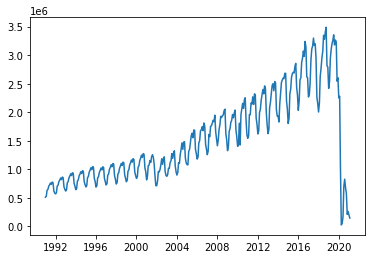

In [4]:
pyplot.plot(series)

In [5]:
# the Time Series to forecast
X = series.values

# split train and test data
LEN_TEST = 72
train, test = X[0:len(X) - LEN_TEST], X[len(X) - LEN_TEST:]

# walk-forward validation
# here are specified the two parameters to avoid execution errors

def single_sarima(p, d, q, P, D, Q): 
    my_order = (p,d,q)
    # m, the period is fixed to 12 months (12 steps in one year)
    m = 12
    my_seasonal_order = (P,D,Q,m)

    # in every iteration reset
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
      # print("Iteration n. %d" % iter)
      model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, 
                  enforce_stationarity=False, 
                  enforce_invertibility=False)
      model_fit = model.fit(disp=0)
      # walk forward
      output = model_fit.forecast()
      predictions.append(output[0])
      # obs = test[t]
      history.append(test[t])
      
      # print('predicted=%.0f, expected=%.0f' % (output[0], test[t]))

    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    
    return rmse


# main, evaluation of hyper-parameters on grid
#
best_rmse = 3000000
par_best = []

iteraz = 1

for p in range(1, 3):
    for d in range(0, 3):
        for q in range(0, 2):
            for P in range(1, 2):
                for D in range(0,1):
                    for Q in range(0,2):
                        print("Iteration n. %d" % iteraz)
                        
                        # for some combinations it is is possible an exception... simply skip
                        try:
                            out_rmse = single_sarima(p,d,q,P,D,Q)
                            
                            if out_rmse < best_rmse:
                                best_rmse = out_rmse
                                par_best = [p, d, q, P, D, Q]
                                
                                print("Best so far: RMSE %d" % best_rmse)
                                
                            # print('Test RMSE: p= %d ,d= %d ,q= %d ,P= %d ,D= %d  %.0f' % (p, d, q, P, D, out_rmse))
                        except Exception as e:
                            pass
                            # print("Exception... ignore !")  
                        iteraz+= 1
print("")
print("Elaboration ended!")
print("Best RMSE: %.0f" % best_rmse)
print("Best paramaters: p= %d ,d= %d ,q= %d ,P= %d ,D= %d, Q= %d" % (par_best[0], par_best[1], par_best[2], par_best[3],
                                                             par_best[4], par_best[5]))

Iteration n. 1
Best so far: RMSE 283395
Iteration n. 2
Iteration n. 3
Iteration n. 4
Iteration n. 5
Iteration n. 6
Iteration n. 7
Iteration n. 8
Iteration n. 9
Iteration n. 10
Iteration n. 11
Iteration n. 12
Iteration n. 13
Iteration n. 14
Iteration n. 15
Iteration n. 16
Iteration n. 17
Iteration n. 18
Iteration n. 19
Iteration n. 20
Iteration n. 21
Iteration n. 22
Iteration n. 23
Iteration n. 24

Elaboration ended!
Best RMSE: 283395
Best paramaters: p= 1 ,d= 0 ,q= 0 ,P= 1 ,D= 0, Q= 0


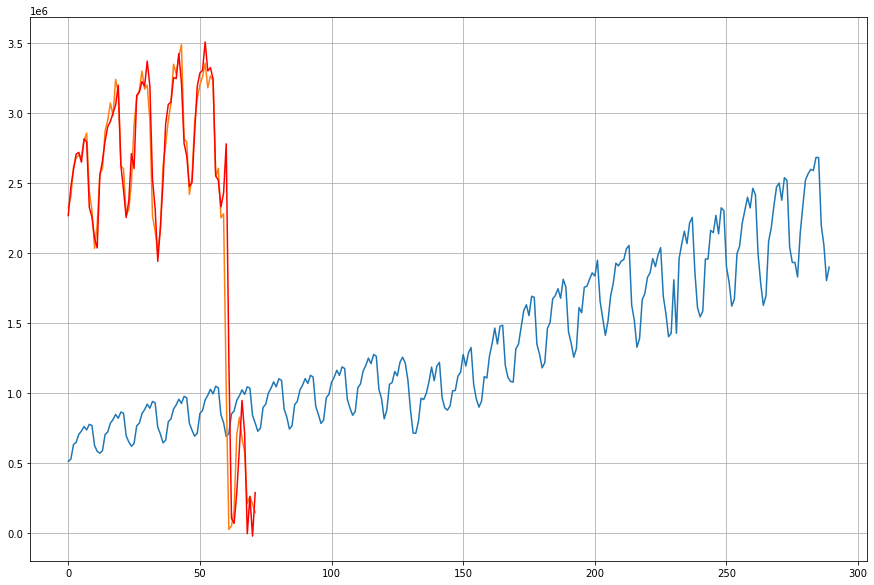

In [6]:
pyplot.rcParams['figure.figsize'] = [15, 10]

my_order = (1,0,0)
# m, the period is fixed to 12
my_seasonal_order = (2,0,0,12)

# in every iteration reset
history = [x for x in train]
predictions = list()

for t in range(len(test)):
      # print("Iteration n. %d" % iter)
      model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, 
                  enforce_stationarity=False, 
                  enforce_invertibility=False)
      model_fit = model.fit(disp=0)
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(obs)

pyplot.plot(train)
pyplot.plot(test)
pyplot.grid()
pyplot.plot(predictions, color='red') 
pyplot.show()